### IMAGE PREPROCESSING

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from glob import glob
from PIL import ImageEnhance, ImageFilter
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image as keras_image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D


In [2]:
# Cell 2: Load all images from raw folder
raw_image_path = r"C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw"

# Get all image files
image_files = sorted(glob(os.path.join(raw_image_path, '*.jpg')) + 
                     glob(os.path.join(raw_image_path, '*.jpeg')) + 
                     glob(os.path.join(raw_image_path, '*.png')))

print(f"Found {len(image_files)} images")
print("\nImage files:")
for f in image_files:
    print(f"  - {f}")

Found 12 images

Image files:
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Bella_neutral.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Bella_smile.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Bella_surprised.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Fadh_neutral.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Fadh_smile.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Fadh_surprised.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Makuochi_neutral.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\raw\Makuochi_smile.jpg
  - C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data

In [3]:
# Organize images by member and expression
images_dict = {}
for img_path in image_files:
    filename = os.path.basename(img_path)
    parts = filename.split('_')
    member_name = parts[0]  # Extract member name
    expression = parts[1].split('.')[0]  # Extract expression
    
    if member_name not in images_dict:
        images_dict[member_name] = {}
    images_dict[member_name][expression] = img_path

print("\n" + "="*50)
print("Organized images by member:")
print("="*50)
for member, expressions in images_dict.items():
    print(f"{member.capitalize()}: {list(expressions.keys())}")




Organized images by member:
Bella: ['neutral', 'smile', 'surprised']
Fadh: ['neutral', 'smile', 'surprised']
Makuochi: ['neutral', 'smile', 'surprised']
Mugisha: ['neutral', 'smile', 'surprised']


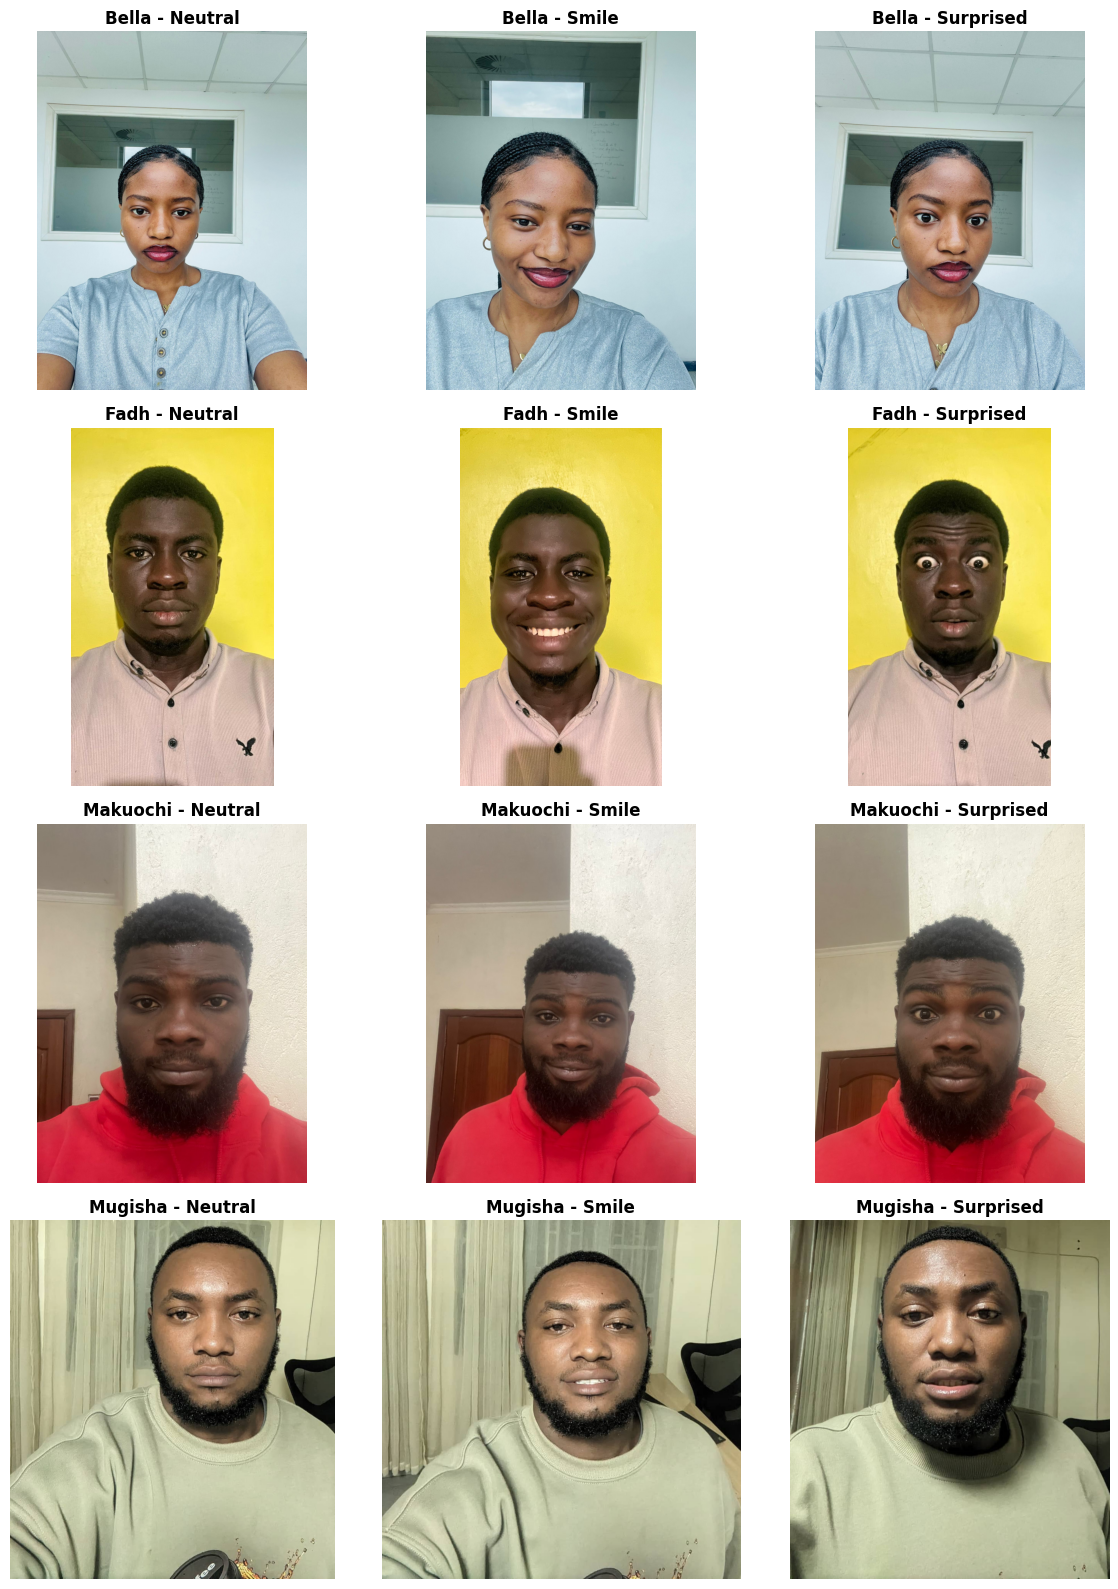

In [4]:
members = sorted(list(images_dict.keys()))
expressions = ['neutral', 'smile', 'surprised']

fig, axes = plt.subplots(len(members), 3, figsize=(12, 4*len(members)))

# Handle case of single member
if len(members) == 1:
    axes = axes.reshape(1, -1)

for i, member in enumerate(members):
    for j, expr in enumerate(expressions):
        img_path = images_dict[member].get(expr)
        if img_path:
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{member.capitalize()} - {expr.capitalize()}", 
                                fontsize=12, fontweight='bold')
            axes[i, j].axis('off')
        else:
            axes[i, j].text(0.5, 0.5, 'Missing', ha='center', va='center', 
                           fontsize=14, color='red')
            axes[i, j].axis('off')

plt.tight_layout()
# Save to results folder
plt.savefig(r'C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\results\images_grid.png', dpi=150, bbox_inches='tight')
plt.show()

In [5]:
# Define augmentation functions
def augment_rotation(img, angle=15):
    """Rotate image by given angle"""
    return img.rotate(angle, fillcolor=(255, 255, 255))

def augment_flip(img):
    """Horizontal flip"""
    return img.transpose(Image.FLIP_LEFT_RIGHT)

def augment_brightness(img, factor=1.3):
    """Adjust brightness"""
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)

def augment_grayscale(img):
    """Convert to grayscale then back to RGB"""
    return img.convert('L').convert('RGB')

def augment_blur(img, radius=2):
    """Apply Gaussian blur"""
    return img.filter(ImageFilter.GaussianBlur(radius))

def augment_contrast(img, factor=1.5):
    """Adjust contrast"""
    enhancer = ImageEnhance.Contrast(img)
    return enhancer.enhance(factor)

In [6]:
# Cell 5: Apply augmentations to all images

augmented_path = r'C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\augmented'
os.makedirs(augmented_path, exist_ok=True)

augmentation_list = []
augmentation_log = []

print("Applying augmentations to all images...")
print("="*60)

for img_path in image_files:
    filename = os.path.basename(img_path)
    base_name = filename.split('.')[0] 
    
    # Load image
    img = Image.open(img_path)
    
    print(f"\nProcessing: {filename}")
    
    # Augmentation 1: Rotation
    img_rot = augment_rotation(img, angle=15)
    rot_path = os.path.join(augmented_path, f"{base_name}_rotation.jpg")
    img_rot.save(rot_path)
    augmentation_list.append(rot_path)
    augmentation_log.append({'original': img_path, 'augmented': rot_path, 'type': 'rotation'})
    print(f"  ✓ Created: {rot_path}")
    
    # Augmentation 2: Flip
    img_flip = augment_flip(img)
    flip_path = os.path.join(augmented_path, f"{base_name}_flip.jpg")
    img_flip.save(flip_path)
    augmentation_list.append(flip_path)
    augmentation_log.append({'original': img_path, 'augmented': flip_path, 'type': 'flip'})
    print(f"  ✓ Created: {flip_path}")
    
    # Augmentation 3: Brightness 
    img_bright = augment_brightness(img, factor=1.2)
    bright_path = os.path.join(augmented_path, f"{base_name}_brightness.jpg")
    img_bright.save(bright_path)
    augmentation_list.append(bright_path)
    augmentation_log.append({'original': img_path, 'augmented': bright_path, 'type': 'brightness'})
    print(f"  ✓ Created: {bright_path}")
    
    # Augmentation 4: Grayscale
    img_gray = augment_grayscale(img)
    gray_path = os.path.join(augmented_path, f"{base_name}_grayscale.jpg")
    img_gray.save(gray_path)
    augmentation_list.append(gray_path)
    augmentation_log.append({'original': img_path, 'augmented': gray_path, 'type': 'grayscale'})
    print(f"  ✓ Created: {gray_path}")

print("\n" + "="*60)
print("AUGMENTATION SUMMARY")
print("="*60)
print(f"Original images: {len(image_files)}")
print(f"Augmented images created: {len(augmentation_list)}")
print(f"Augmentations per image: {len(augmentation_list) // len(image_files)}")
print(f"Total images: {len(image_files) + len(augmentation_list)}")
print(f"\nAll augmented images saved to: {augmented_path}")

Applying augmentations to all images...

Processing: Bella_neutral.jpg
  ✓ Created: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\augmented\Bella_neutral_rotation.jpg
  ✓ Created: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\augmented\Bella_neutral_flip.jpg
  ✓ Created: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\augmented\Bella_neutral_brightness.jpg
  ✓ Created: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\augmented\Bella_neutral_grayscale.jpg

Processing: Bella_smile.jpg
  ✓ Created: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\augmented\Bella_smile_rotation.jpg
  ✓ Created: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\augmented\Bella_smile_flip.jpg
  ✓ Created: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\data\images\a

### FEATURE EXTRACTION

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
feature_extractor = Model(inputs=base_model.input, outputs=x)

print("✓ Feature extractor loaded successfully")
print(f"✓ Input shape: {feature_extractor.input_shape}")
print(f"✓ Output shape: {feature_extractor.output_shape}")
print(f"✓ Feature vector size: {feature_extractor.output_shape[1]} dimensions")

✓ Feature extractor loaded successfully
✓ Input shape: (None, 224, 224, 3)
✓ Output shape: (None, 512)
✓ Feature vector size: 512 dimensions


In [8]:
# Extract features from all images (original + augmented)
all_images = image_files + augmentation_list

print(f"Extracting features from {len(all_images)} images...")
print("="*60)

features_data = []

for idx, img_path in enumerate(all_images, 1):
    # Load and preprocess image
    img = keras_image.load_img(img_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Extract features
    features = feature_extractor.predict(img_array, verbose=0)
    features = features.flatten()
    
    # Get label from filename
    filename = os.path.basename(img_path)
    member_name = filename.split('_')[0]
    
    # Store features with metadata
    feature_dict = {
        'member_id': member_name,
        'image_path': img_path,
        'label': member_name
    }
    
    # Add all feature values
    for i, feat_val in enumerate(features):
        feature_dict[f'feature_{i+1}'] = feat_val
    
    features_data.append(feature_dict)
    
    # Progress indicator
    if idx % 10 == 0 or idx == len(all_images):
        print(f"Processed: {idx}/{len(all_images)} images")

print("\n✓ Feature extraction complete!")

Extracting features from 60 images...
Processed: 10/60 images
Processed: 20/60 images
Processed: 30/60 images
Processed: 40/60 images
Processed: 50/60 images
Processed: 60/60 images

✓ Feature extraction complete!


In [9]:
# Create DataFrame and save to CSV
features_df = pd.DataFrame(features_data)


output_path = r'C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\results\image_features.csv'
features_df.to_csv(output_path, index=False)

print(f"✓ Features saved to: {output_path}")


✓ Features saved to: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\results\image_features.csv


In [10]:
models_path = r'C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\models'
os.makedirs(models_path, exist_ok=True)


In [11]:
# Save feature extractor
extractor_file = os.path.join(models_path, 'feature_extractor.h5')
feature_extractor.save(extractor_file)
print(f"✓ Feature extractor saved: {extractor_file}")

✓ Feature extractor saved: C:\Users\fadhl\OneDrive\Desktop\Multimodal Data Preprocessing Assignment\models\feature_extractor.h5
